# Analisi della struttura della popolazione in Italia

L'analisi ha lo scopo di individuare le relazioni tra i principali indici di struttura della popolazione italiana e costruire un modello atto a predirre l'indice di dipendenza strutturale.

## Legenda

**Indice di vecchiaia [ind_vecch]**
<br>
Rappresenta il grado di invecchiamento di una popolazione. È il rapporto percentuale tra il numero degli ultrassessantacinquenni ed il numero dei giovani fino ai 14 anni. Ad esempio, nel 2021 l'indice di vecchiaia per l'Abruzzo dice che ci sono 202,5 anziani ogni 100 giovani.
<br><br>
**Indice di dipendenza strutturale [ind_dip_strut]**
<br>
Rappresenta il carico sociale ed economico della popolazione non attiva (0-14 anni e 65 anni ed oltre) su quella attiva (15-64 anni). Ad esempio, teoricamente, in Abruzzo nel 2021 ci sono 58,6 individui a carico, ogni 100 che lavorano.
<br><br>
**Indice di ricambio della popolazione attiva [ind_rica_pop_att]**
<br>
Rappresenta il rapporto percentuale tra la fascia di popolazione che sta per andare in pensione (60-64 anni) e quella che sta per entrare nel mondo del lavoro (15-19 anni). La popolazione attiva è tanto più giovane quanto più l'indicatore è minore di 100. Ad esempio, in Abruzzo nel 2021 l'indice di ricambio è 152,4 e significa che la popolazione in età lavorativa è molto anziana.
<br><br>
**Indice di struttura della popolazione attiva [ind_strut_pop_att]**
<br>
Rappresenta il grado di invecchiamento della popolazione in età lavorativa. È il rapporto percentuale tra la parte di popolazione in età lavorativa più anziana (40-64 anni) e quella più giovane (15-39 anni).
<br><br>
**Carico di figli per donna feconda [ind_fgl_don_fec]**
<br>
È il rapporto percentuale tra il numero dei bambini fino a 4 anni ed il numero di donne in età feconda (15-49 anni). Stima il carico dei figli in età prescolare per le mamme lavoratrici.
<br><br>
**Indice di natalità [ind_nat_1000]**
<br>
Rappresenta il numero medio di nascite in un anno ogni mille abitanti.
<br><br>
**Indice di mortalità [ind_mort_1000]**
<br>
Rappresenta il numero medio di decessi in un anno ogni mille abitanti.
<br><br>

Fonte https://www.tuttitalia.it/

Importazione dei moduli necessari

In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parametri di visualizzazione
sns.set(rc={"figure.figsize":(12, 5)})
sns.set_context("notebook")
sns.set_style("white")

### Web Scraping 
Questa sezione ha lo scopo di reperire sul web i dati relativi alla struttura della popolazione di ogni regione italiana e inserirli in un Dataframe, in modo da poterli utilizzare. 

Il sito su cui lo scraping viene effettuato è www.tuttitalia.it .

In [2]:
# URL di riferimento
url = "https://www.tuttitalia.it/"

# Estrae il codice HTML di riferimento
html = requests.get(url).content

# Crea la "soup" con il codice HTML
soup = BeautifulSoup(html)

In [3]:
# Estrae i nomi delle regioni e li inserisce in una lista
regioni =[x.getText() for x in soup.find_all("dl")[0].find_all("dt")]

display(regioni)

['Abruzzo',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardia',
 'Marche',
 'Molise',
 'Piemonte',
 'Puglia',
 'Sardegna',
 'Sicilia',
 'Toscana',
 'Trentino-Alto Adige',
 'Umbria',
 "Valle d'Aosta",
 'Veneto']

In [4]:
# Lista vuota
statistiche = []

# Itera sulla lista delle regioni
for i in range(len(regioni)):
    
    # Individua l'URL della pagina che contiene le statistiche della regione
    url_regione = "https://www.tuttitalia.it/" + regioni[i].lower().replace(" ", "-").replace("'", "-") + "/statistiche/indici-demografici-struttura-popolazione/"
    
    # Estrae il codice HTML di riferimento
    html_regione = requests.get(url_regione).content
    
    # Inserisce la tabella con le statistiche di interesse in un dataframe
    df = pd.read_html(html_regione, decimal=",", thousands=".", header=0)[1].drop(0, axis=0)
    
    # Aggiunge il dataframe nella lista
    statistiche.append(df)

In [5]:
# A ogni dataframe presente nella lista aggiunge una colonna con il nome della regione corrispondente
for i in range(len(statistiche)):
    statistiche[i]["Regione"] = regioni[i]

In [6]:
# Concatena tutti i dataframe presenti nella lista
dati = pd.concat(statistiche)


display(dati.head())
display(dati.shape)

# Controlla che siano state estratte tutte le 20 regioni
print("Regioni:", len(dati.Regione.unique()))

,Anno,Indice divecchiaia,Indice didipendenzastrutturale,Indice diricambiodellapopolazioneattiva,Indice distrutturadellapopolazioneattiva,Indice dicaricodi figliper donnafeconda,Indice dinatalità(x 1.000 ab.),Indice dimortalità(x 1.000 ab.),Regione
1,2002.0,147.0,52.5,105.7,91.8,17.9,8.3,10.5,Abruzzo
2,2003.0,150.7,52.9,105.1,93.4,17.9,8.6,10.7,Abruzzo
3,2004.0,153.0,52.7,103.7,94.9,17.9,8.6,10.1,Abruzzo
4,2005.0,155.9,52.9,101.7,96.9,18.0,8.6,10.4,Abruzzo
5,2006.0,158.8,53.1,97.7,99.5,18.0,8.5,10.1,Abruzzo


(400, 9)

Regioni: 20


## Data Cleaning & Validation
Questa sezione ha lo scopo di effettuare la pulizia dei dati necessaria perché questi siano utilizzabili per analisi esplorativa e creazione di un modello di machine learning.

In [7]:
# Rinomina le colonne del dataframe
dati.columns = ["Anno", "ind_vecch", "ind_dip_strut", "ind_rica_pop_att", 
                "ind_strut_pop_att", "ind_fgl_don_fec", "ind_nat_1000", 
                "ind_mort_1000", "Regione"]

In [8]:
# Converte il tipo di dato dell'anno in numero intero
dati["Anno"] = dati["Anno"].astype('int')

# Converte il tipo di dato delle altre colonne con dati numerici in numero decimale (reale)
for x in dati.columns[1:8]:
    dati[x] = dati[x].str.replace("-", "").replace("", np.nan).astype("float")

In [9]:
# Riepiloga il tipo di dato di ogni colonna
dati.dtypes

Anno                   int64
ind_vecch            float64
ind_dip_strut        float64
ind_rica_pop_att     float64
ind_strut_pop_att    float64
ind_fgl_don_fec      float64
ind_nat_1000         float64
ind_mort_1000        float64
Regione               object
dtype: object

La tipologia di dato di ogni colonna ora è corretta.

In [10]:
# Verifica che l'anno meno recente e quello più recente siano gli stessi per ogni regione
dati.groupby("Regione").Anno.agg([np.min, np.max])

,amin,amax
Regione,,
Abruzzo,2002,2021
Basilicata,2002,2021
Calabria,2002,2021
Campania,2002,2021
Emilia-Romagna,2002,2021
Friuli Venezia Giulia,2002,2021
Lazio,2002,2021
Liguria,2002,2021
Lombardia,2002,2021


In [11]:
# Verifica la presenza di valori nulli
display(dati.isnull().sum())

# individua i valori nulli
dati[(dati.ind_nat_1000.isnull()) | (dati.ind_nat_1000.isnull())]

Anno                  0
ind_vecch             0
ind_dip_strut         0
ind_rica_pop_att      0
ind_strut_pop_att     0
ind_fgl_don_fec       0
ind_nat_1000         20
ind_mort_1000        20
Regione               0
dtype: int64

,Anno,ind_vecch,ind_dip_strut,ind_rica_pop_att,ind_strut_pop_att,ind_fgl_don_fec,ind_nat_1000,ind_mort_1000,Regione
20,2021,202.5,58.6,152.4,144.4,18.0,NaN,NaN,Abruzzo
20,2021,206.6,55.6,146.5,135.7,17.2,NaN,NaN,Basilicata
20,2021,173.3,56.4,136.8,128.0,19.4,NaN,NaN,Calabria
20,2021,138.6,52.1,112.4,121.2,19.4,NaN,NaN,Campania
20,2021,189.7,58.5,145.4,149.2,18.6,NaN,NaN,Emilia-Romagna
20,2021,227.1,62.0,155.8,158.1,17.9,NaN,NaN,Friuli Venezia Giulia
20,2021,172.9,55.3,142.2,147.7,18.2,NaN,NaN,Lazio
20,2021,262.3,65.8,168.6,162.6,17.3,NaN,NaN,Liguria
20,2021,172.3,56.7,134.5,143.3,19.1,NaN,NaN,Lombardia
20,2021,207.5,60.5,149.6,148.3,17.7,NaN,NaN,Marche


I valori nulli riguardano gli indici di natalità e mortalità dell'anno 2021. Per evitare di perdere informazioni importanti escludendo l'intero anno 2021, possiamo scegliere di mantenere i valori nulli nel dataset evitando però di usare gli indici di natalità e mortalità come variabili predittive all'interno del modello.

## Analisi esplorativa
Questa sezione ha lo scopo di esplorare i dati individuando relazioni e correlazioni tra le variabili.

In [12]:
# Mostra le principali statistiche delle variabili numeriche
dati.drop("Anno", axis=1).describe()

,ind_vecch,ind_dip_strut,ind_rica_pop_att,ind_strut_pop_att,ind_fgl_don_fec,ind_nat_1000,ind_mort_1000
count,400.000000,400.000000,400.000000,400.000000,400.000000,380.000000,380.000000
mean,163.988500,54.073750,130.217000,120.246250,19.202250,8.377368,10.487632
std,35.821717,4.359179,26.917926,20.300131,1.560853,1.220888,1.455290
min,77.200000,42.700000,69.100000,77.200000,15.300000,5.200000,7.700000
25%,139.375000,51.000000,111.275000,105.125000,18.175000,7.500000,9.300000
50%,166.650000,53.800000,134.250000,118.850000,19.100000,8.500000,10.400000
75%,187.025000,56.550000,148.900000,136.000000,20.200000,9.300000,11.325000
max,262.400000,65.800000,205.200000,164.600000,23.100000,11.400000,16.900000


Notiamo che in tutte le variabili vi è poca differenza tra i valori di media e mediana e la deviazione standard è contenuta. Ciò significa che i dati sono omogenei e non dispersi.

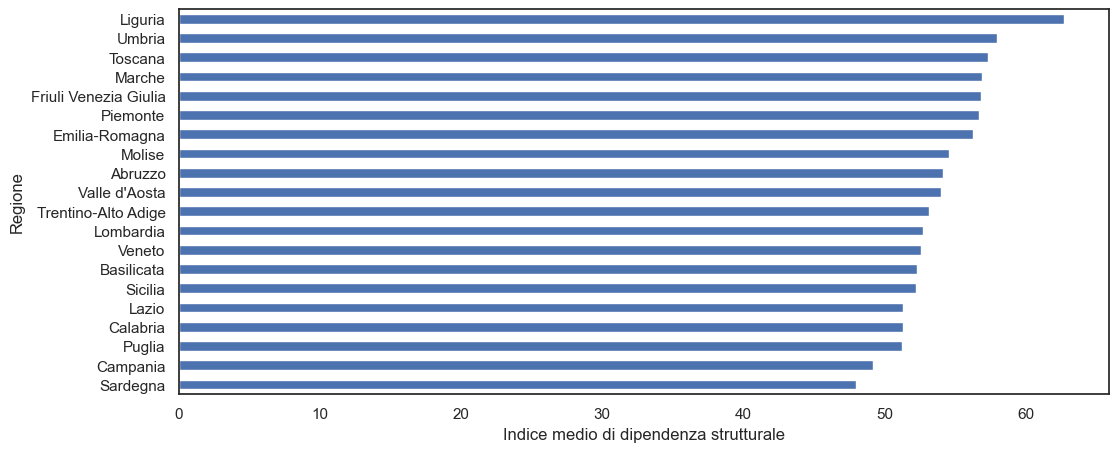

In [13]:
# Visualizza l'indice medio di dipendenza strutturale per regione
dati.groupby("Regione").ind_dip_strut.mean().sort_values(ascending = True).plot.barh()
plt.xlabel("Indice medio di dipendenza strutturale");

In [14]:
# Raggruppa per anno e calcola la media di ogni indice
grouped = dati.groupby("Anno", as_index=False)[dati.drop(["Anno", "Regione"], axis=1).columns].mean()

display(grouped.head())
display(grouped.shape)

,Anno,ind_vecch,ind_dip_strut,ind_rica_pop_att,ind_strut_pop_att,ind_fgl_don_fec,ind_nat_1000,ind_mort_1000
0,2002,145.070,50.240,125.485,94.920,18.740,9.080,10.075
1,2003,147.065,50.815,126.605,96.975,18.930,9.110,10.495
2,2004,148.910,51.095,124.285,98.575,19.030,9.290,9.735
3,2005,150.585,51.545,120.565,100.830,19.210,9.095,10.060
4,2006,152.335,52.015,114.610,103.325,19.235,9.160,9.845


(20, 8)

<AxesSubplot:>

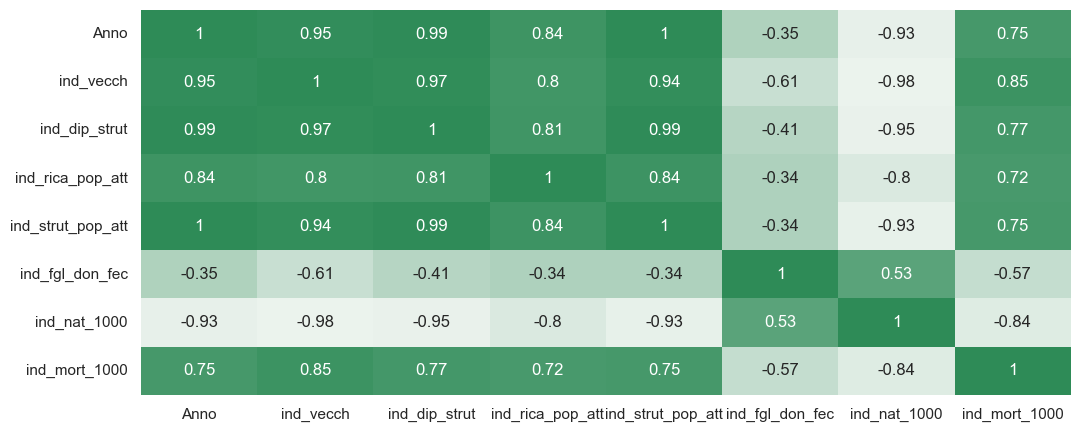

In [15]:
# Calcola i coefficienti di correlazione per le variabili numeriche
pal = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(grouped.corr(), annot=True, cmap=pal, cbar=False)

Notiamo dei coefficienti di correlazione molto forti tra diverse variabili. Colpiscono in particolare la fortissima correlazione tra anno e struttura della popolazione attiva, quella tra anno e dipendenza strutturale, quella tra struttura della popolazione attiva e dipendenza strutturale e quella tra indice di natalità e dipendenza strutturale. 

Visualizziamo ora la variazione di alcuni indici nel tempo.

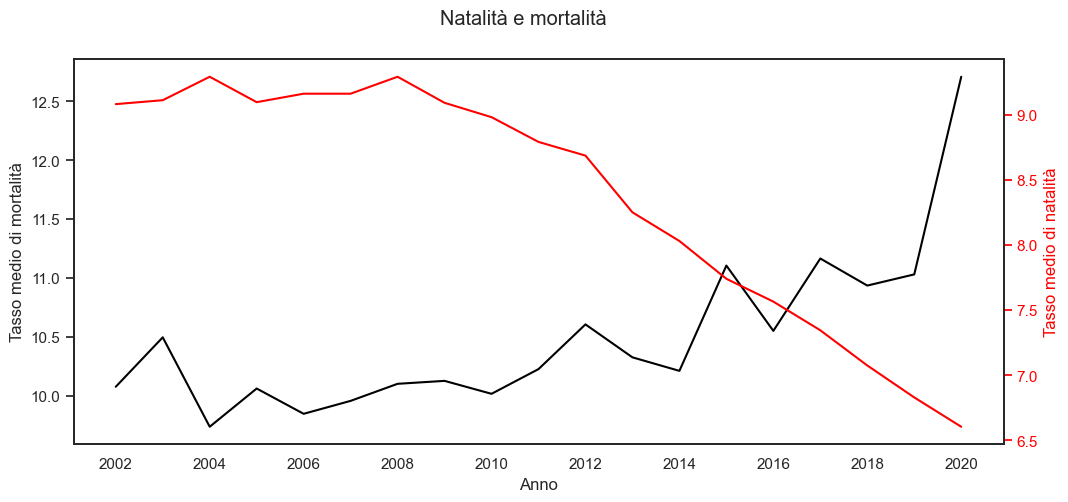

In [16]:
# Visualizza natalità e mortalità nel tempo
fig, ax = plt.subplots()
ax.plot(grouped.Anno, grouped.ind_mort_1000, color="black")
ax2 = ax.twinx()
ax2.plot(grouped.Anno, grouped.ind_nat_1000, color="red")
plt.xticks(range(min(grouped.Anno), max(grouped.Anno), 2))
ax.set_xlabel("Anno")
ax.set_ylabel("Tasso medio di mortalità")
ax2.set_ylabel("Tasso medio di natalità", color="red")
ax2.tick_params("y", colors="red")
fig.suptitle("Natalità e mortalità");

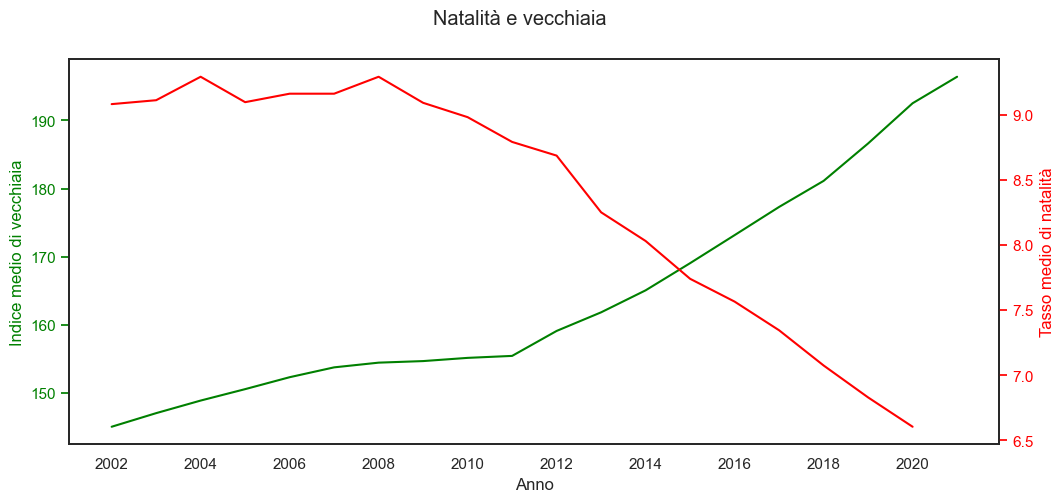

In [17]:
# Visualizza natalità e vecchiaia nel tempo
fig, ax = plt.subplots()
ax.plot(grouped.Anno, grouped.ind_vecch, color="green")
ax2 = ax.twinx()
ax2.plot(grouped.Anno, grouped.ind_nat_1000, color="red")
plt.xticks(range(min(grouped.Anno), max(grouped.Anno), 2))
ax.set_xlabel("Anno")
ax.set_ylabel("Indice medio di vecchiaia", color="green")
ax2.set_ylabel("Tasso medio di natalità", color="red")
ax.tick_params("y", colors="green")
ax2.tick_params("y", colors="red")
fig.suptitle("Natalità e vecchiaia");

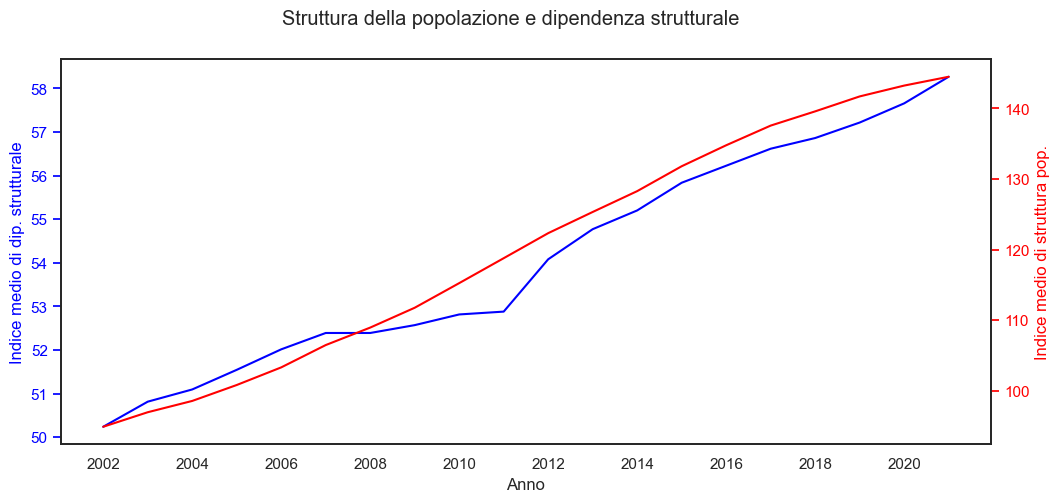

In [18]:
# Visualizza struttura della popolazione attiva e dipendenza strutturale nel tempo
fig, ax = plt.subplots()
ax.plot(grouped.Anno, grouped.ind_dip_strut, color="blue")
ax2 = ax.twinx()
ax2.plot(grouped.Anno, grouped.ind_strut_pop_att, color="red")
plt.xticks(range(min(grouped.Anno), max(grouped.Anno), 2))
ax.set_xlabel("Anno")
ax.set_ylabel("Indice medio di dip. strutturale", color="blue")
ax2.set_ylabel("Indice medio di struttura pop.", color="red")
ax.tick_params("y", colors="blue")
ax2.tick_params("y", colors="red")
fig.suptitle("Struttura della popolazione e dipendenza strutturale");

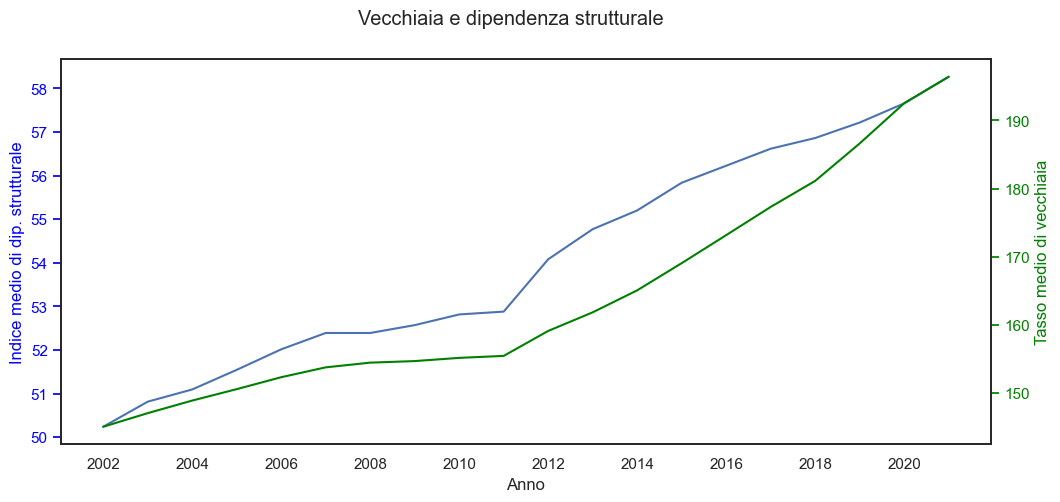

In [19]:
# Visualizza vecchiaia e dipendenza strutturale nel tempo
fig, ax = plt.subplots()
ax.plot(grouped.Anno, grouped.ind_dip_strut)
ax2 = ax.twinx()
ax2.plot(grouped.Anno, grouped.ind_vecch, color="green")
plt.xticks(range(min(grouped.Anno), max(grouped.Anno), 2))
ax.set_xlabel("Anno")
ax.set_ylabel("Indice medio di dip. strutturale", color="blue")
ax2.set_ylabel("Tasso medio di vecchiaia", color="green")
ax.tick_params("y", colors="blue")
ax2.tick_params("y", colors="green")
fig.suptitle("Vecchiaia e dipendenza strutturale");

## Costruzione del modello
Questa sezione ha lo scopo di mettere a confronto diversi modelli di machine learning, scegliere quello più performante mediante cross validation e utilizzarlo per fare previsioni sull'indice di dipendenza strutturale.

Importazione dei moduli necessari

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error

Trattandosi di un problema di regressione e avendo rilevato correlazioni molto forti, l'individuazione di più variabili esplicative potrebbe comporta il problema della multicollinearità e dell'autocorrelazione. Ci limiteremo pertanto a un modello con un'unica variabile indipendente: l'anno. 

Per un modello con più variabili esplicative si veda la sezione **appendice**.

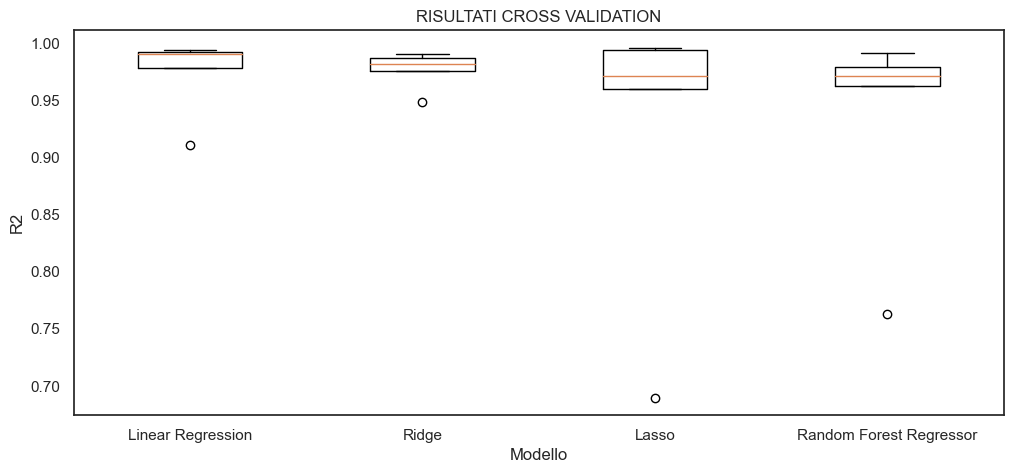

In [21]:
# Inizializza il seed
np.random.seed(50)

# Definisce variabile indipendente (X) e dipendente (y)
X = grouped["Anno"].values.reshape(-1,1)
y = grouped.ind_dip_strut

# Dizionario dei principali modelli di regressione
modelli = {"Linear Regression" : LinearRegression(), "Ridge" : Ridge(), "Lasso" : Lasso(), "Random Forest Regressor" : RandomForestRegressor()}

# Lista vuota
risultati = []

# Itera sul dizionario
for modello in modelli.values():
    
    # Inizializza il Kfold
    cv = KFold(n_splits=5, shuffle=True)
    
    # Esegue la cross validation e calcola l'R2
    scores = cross_val_score(modello, X, y, cv=cv)
    
    # Aggiunge i punteggi alla lista
    risultati.append(scores)

# Visualizza i risultati
plt.boxplot(risultati, labels=modelli.keys())
plt.xlabel("Modello")
plt.ylabel("R2")
plt.title("RISULTATI CROSS VALIDATION");

Tutti i quattro modelli si comportano ottimamente, ma quello lievemente più performante è la regressione lineare.

In [22]:
# Inizializza il modello
modello = LinearRegression()

# Addestra il modello
modello.fit(X,y)

# Esegue una previsione
y_pred = modello.predict(X)

# Calcola R2 e errore medio assoluto
R2 = round(modello.score(X, y),2) * 100
MAE = round(mean_absolute_error(y, y_pred),2)

print("Il modello spiega il {}% della variabilità dei dati, con un errore medio di {}".format(R2, MAE))

Il modello spiega il 98.0% della variabilità dei dati, con un errore medio di 0.25


## Previsione
Eseguiamo una previsione dell'indice di dipendenza strutturale.

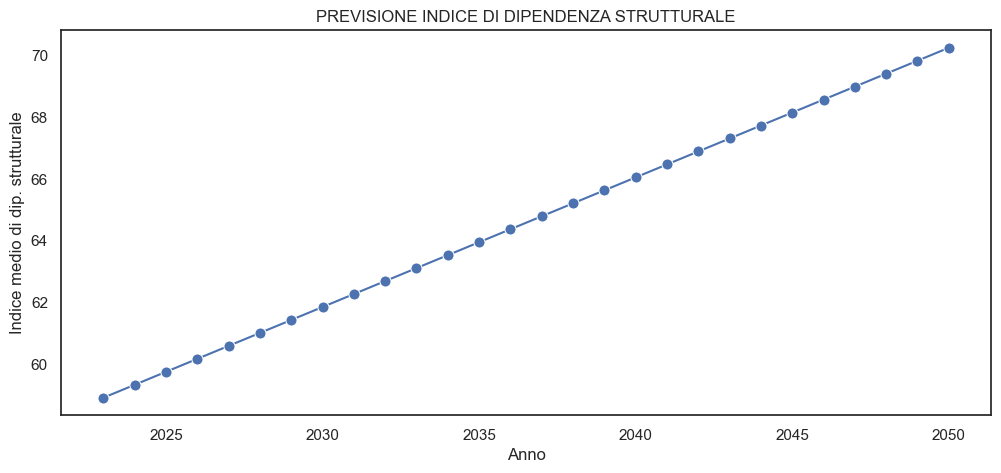

In [23]:
# Array contenente gli anni dal 2023 al 2050
anni = np.arange(2023, 2051, 1)

# Lista vuota
previsioni = []

# Itera sugli anni
for x in anni:
    
    # Esegue una previsione della dipendenza strutturale
    pred = modello.predict(x.reshape(1,1))
    
    # Converte la predizione in numero decimale e la aggiunge alla lista
    previsioni.append(float(pred))

# Visualizza i risultati
sns.lineplot(x=anni, y=previsioni, marker="o", 
             markersize=8, linewidth=1.5).set(title="PREVISIONE INDICE DI DIPENDENZA STRUTTURALE",
                                     ylabel = "Indice medio di dip. strutturale",
                                     xlabel = "Anno");

Stanti le condizioni attuali in Italia, la previsione è di una media di 70 individui a carico ogni 100 lavoratori entro il 2050.

## Appendice

### Regressione lineare multipla

In questa sezione creeremo un modello di regressione lineare con più variabili esplicative. Utilizzeremo il modulo statsmodels in quanto più adeguato per ottenere informazioni che consentano di valutare la bontà del modello.

Le variabii esplicative saranno l'indice di struttura della popolazione attiva e l'indice di vecchiaia.

In [24]:
from statsmodels.formula.api import ols

# Creazione del modello
modello = ols('ind_dip_strut ~ ind_strut_pop_att + ind_vecch', data=grouped).fit()

Poiché le due variabili esplicative sono autocorrelate, occorre valutare se entrambe sono significative per spiegare la variabilità dei dati.

In [25]:
# Mostra le statistiche della regressione
modello.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ind_dip_strut   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
No. Observations:                  20   F-statistic:                     910.3
Covariance Type:            nonrobust   Prob (F-statistic):           5.16e-18
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            33.4790      0.791     42.345      0.000      31.811      35.147
ind_strut_pop_att     0.1049      0.010     10.124      0.000       0.083       0.127
ind_vecch             0.0486      0.011      4.327      0.000       0.025       0.072
=====================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Il p-value di entrambe le variabili è sotto lo 0.001, pertanto entrambe le variabili sono significative. Inoltre, l'R2 e l'R2 corretto (che penalizza l'uso di più variabili) hanno una differenza minima e sono entrambi vicini al 100%.

Generiamo ora valori casuali per la struttura della popolazione attiva e l'indice di vecchiaia e effettuiamo una previsione.

In [26]:
# Inizializza il seed
np.random.seed(50)

# Crea il dataframe con i valori casuali
nuovi_valori = pd.DataFrame({"ind_strut_pop_att" : np.random.choice(np.arange(150, 250, 10), size = 10, replace=False),  
                           "ind_vecch" : np.random.choice(np.arange(200, 300, 10), size = 10, replace=False)})

display(nuovi_valori)

,ind_strut_pop_att,ind_vecch
0,220,210
1,230,280
2,210,290
3,170,200
4,190,230
5,160,240
6,200,270
7,180,220
8,240,250
9,150,260


In [27]:
# Aggiunge al dataframe una colonna con le previsioni fatte dal modello sui nuovi valori
nuovi_valori["previsioni"] = modello.predict(nuovi_valori)

# Ordina il dataframe per struttura della popolazione attiva
nuovi_valori.sort_values("ind_strut_pop_att", inplace=True)

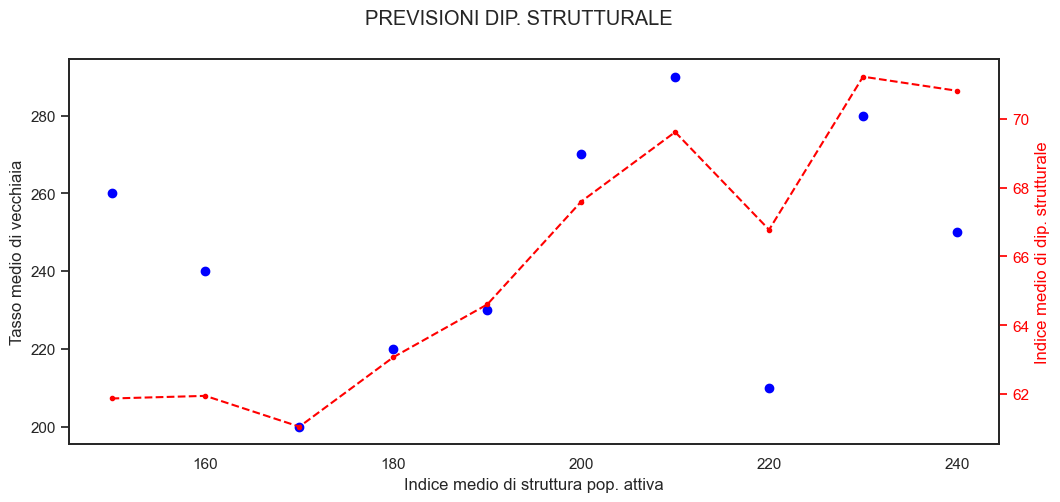

In [28]:
# Visualizza i risultati
fig, ax = plt.subplots()
ax.scatter(nuovi_valori.ind_strut_pop_att, nuovi_valori.ind_vecch, color="blue")
ax2 = ax.twinx()
ax2.plot(nuovi_valori.ind_strut_pop_att, nuovi_valori.previsioni ,color="red", marker='.', linestyle="--")
ax.set_xlabel("Indice medio di struttura pop. attiva")
ax.set_ylabel("Tasso medio di vecchiaia")
ax2.set_ylabel("Indice medio di dip. strutturale", color="red")
ax2.tick_params("y", colors="red")
fig.suptitle("PREVISIONI DIP. STRUTTURALE");

### Generalizzazione del modello

Questa sezione ha lo scopo di valutare la capacità del modello di generalizzare su dati mai visti.

Come prima cosa, vediamo come muta l'R2 al variare della percentuale di dati assegnata alla fase di addestramento.

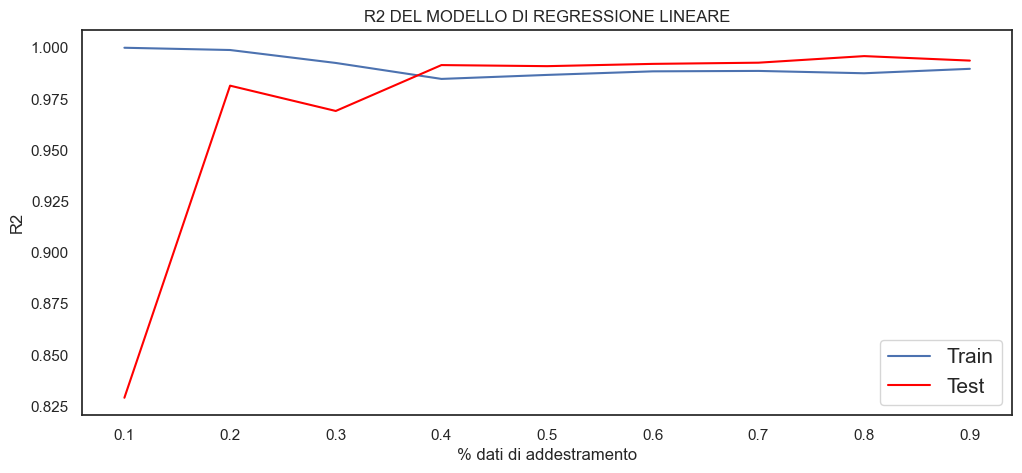

In [29]:
from sklearn.model_selection import train_test_split

# Definisce le variabili indipendenti (X) e la variabile dipendente (y)
X = grouped[['ind_strut_pop_att', 'ind_vecch']]
y = grouped['ind_dip_strut']

# Liste vuote
risultati_train = []
risultati_test = []

# Genera un array di valori da 0.1 a 0.9
perc_dati_addstramento = np.arange(0.1, 1, 0.1)

# Itera sull'array
for x in perc_dati_addstramento:
    
    # divide il dataset in dati di addestramento e dati di test sulla base della percentuale di riferimento
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=x, random_state=42)
    
    # Inizializza il modello
    modello = LinearRegression()
    
    # Addestra il modello 
    modello.fit(X_train, y_train)
    
    # Aggiunge alla lista risultati_train l'R2 dei dati di addestramento
    risultati_train.append(modello.score(X_train, y_train))
    
    # Aggiunge alla lista risultati_test l'R2 dei dati di test
    risultati_test.append(modello.score(X_test, y_test))


# Visualizza i risultati
plt.plot(perc_dati_addstramento, risultati_train)
plt.plot(perc_dati_addstramento, risultati_test, color="red")
plt.xlabel("% dati di addestramento")
plt.ylabel("R2")
plt.title("R2 DEL MODELLO DI REGRESSIONE LINEARE")
plt.legend(["Train", "Test"], fontsize=15);

Assegnando all'addestramento una percentuale del 40% o superiore dei dati, il valore dell'R2 del test si mantiene costantemente più alto rispetto a quello dell'addestramento. Cio' significa che il modello generalizza bene senza avere necessità di molti dati di addestramento.

Utiliziamo ora il bootstrapping per generare 200 campioni casuali (100 di addestramento e 100 di test) e calcolare l'R2 di ciascuno.

Media train: 0.99
Media test:  0.98


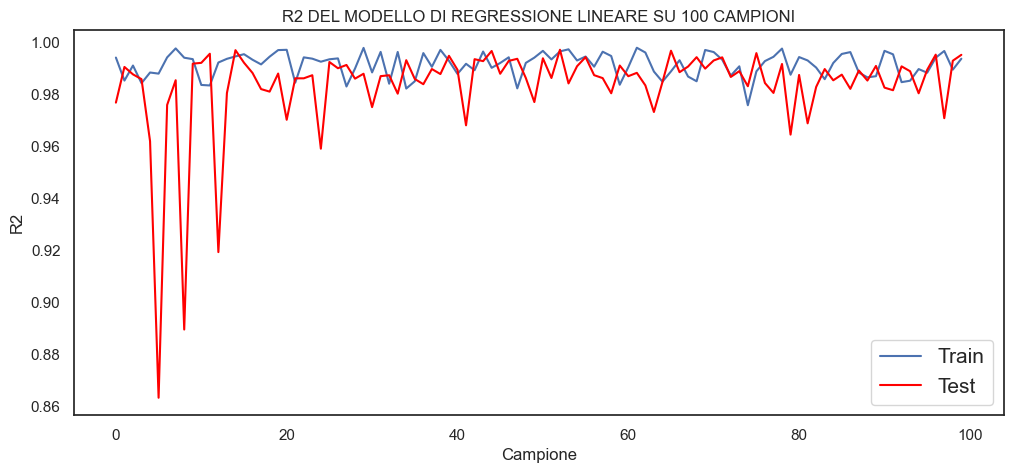

In [30]:
# Inizializza il seed
np.random.seed(50)

# Liste vuote
risultati_train = []
risultati_test = []

# Itera su un range di 100 unità
for x in range(100):
    
    # Estrae un campione di 10 elementi dal dataframe grouped 
    campione_train = grouped[["ind_vecch", "ind_strut_pop_att", "ind_dip_strut"]].sample(10)
    campione_test = grouped[["ind_vecch", "ind_strut_pop_att", "ind_dip_strut"]].sample(10)
    
    # Definisce le variabili di addestramento
    X_train = campione_train[["ind_vecch", "ind_strut_pop_att"]]
    y_train = campione_train["ind_dip_strut"]
    
    # Definisce le variabili di test
    X_test = campione_test[["ind_vecch", "ind_strut_pop_att"]]
    y_test = campione_test["ind_dip_strut"]
    
    # Addestra il modello
    modello.fit(X_train, y_train)
    
    # Calcola l'R2 per dati di addestramento e dati di test
    train_score =modello.score(X_train, y_train)
    test_score = modello.score(X_test, y_test)
    
    # Aggiunge i risultati alle rispettive liste
    risultati_train.append(train_score)
    risultati_test.append(test_score)

# Calcola l'R2 medio per dati di addestramento e di test
print("Media train:", round(np.mean(risultati_train),2))
print("Media test: ", round(np.mean(risultati_test),2))
    
# Visualizza i risultati    
plt.plot(range(100), risultati_train)
plt.plot(range(100), risultati_test, color="red")
plt.xlabel("Campione")
plt.ylabel("R2")
plt.title("R2 DEL MODELLO DI REGRESSIONE LINEARE SU 100 CAMPIONI")
plt.legend(["Train", "Test"], loc="lower right", fontsize=15);

Le medie sono molto simili e su 100 iterazioni si possono notare solo tre casi di overfitting, in uno dei quali l' R2 si mantiene comunque sopra il 90%. Il modello ha una buona capacità di generalizzazione.